In [ ]:
#!conda install ipywidgets

In [ ]:
# Jupyter notebook
from IPython.display import Markdown as md
from IPython import display
from IPython.display import display
from base64 import b64decode

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

# Eurostat data
from eurostatapiclient import EurostatAPIClient

# Maps
import folium
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import geopandas as gpd
from geopandas.tools import geocode

# Data Science
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

# Recycling Data

In [ ]:
from eurostatapiclient import EurostatAPIClient

#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

In [ ]:
%%html
<iframe src="https://ec.europa.eu/eurostat/databrowser/view/env_waspacr/default/table?lang=en" width="1000" height="800"></iframe>

In [ ]:
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 
                   'CZ': 'Czechia', 'DE': 'Germany', 'DK': 'Denmark', 'EE':'Estonia', 
                   'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 
                   'HR':'Croatia', 'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 
                   'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT': 'Malta', 
                   'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 
                   'SE':'Sweden', 'SI':'Slovenia', 'SK':'Slovakia', 'UK':'United Kingdom'}

packaging_types = {'W150101': 'Paper and cardboard packaging',
                   'W150102': 'Plastic packaging',
                   'W150103': 'Wooden packaging',
                   'W150104': 'Metallic packaging',
                   'W150107': 'Glass packaging',
                   'W150199': 'Other packaging'}

In [ ]:
par_df1 = {
    'waste': packaging_types.keys(),
    'unit': ['RT'],
    'geo': list(countries_names.keys()),
}

df1 = client.get_dataset('env_waspacr', params=par_df1).to_dataframe()

df1.rename(columns={'geo': 'country', 'time': 'year'}, inplace=True)
df1['year'] = df1['year'].astype('int')
df1['country'] = df1['country'].map(countries_names)
df1['waste'] = df1['waste'].map(packaging_types)

In [ ]:
print(len(df1))
print(df1.dtypes)
df1.sample(5)

3696
values     float64
waste       object
unit        object
country     object
year         int32
dtype: object


,values,waste,unit,country,year
2365,51.0,Metallic packaging,RT,Romania,2008
1990,86.8,Metallic packaging,RT,Denmark,2007
2590,88.7,Glass packaging,RT,Germany,2013
906,NaN,Plastic packaging,RT,Hungary,2001
921,31.4,Plastic packaging,RT,Hungary,2016


In [ ]:
import sys
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    from google.colab import drive
    drive.mount('/content/gdrive', force_remount=True)
    dir = os.path.join('gdrive', 'MyDrive', 'Eurostat', '01 - Intro to Python for Data Science')
else:
    dir = '.'
    
data_dir = os.path.join(dir, 'data')
os.makedirs(data_dir, exist_ok=True)
data_dir

'.\\data'

In [ ]:
filename = os.path.join(data_dir, 'env_waspacr.csv')
df1.to_csv(filename, index=False)

In [ ]:
df3 = pd.pivot(
    df1,
    index=['year', 'country'],
    columns=['waste'],
    values='values')
df3

waste                Glass packaging  Metallic packaging  Other packaging  \
year country                                                                
1997 Austria                    76.5                34.1             53.6   
     Belgium                    70.1                70.3             11.3   
     Bulgaria                    NaN                 NaN              NaN   
     Croatia                     NaN                 NaN              NaN   
     Cyprus                      NaN                 NaN              NaN   
...                              ...                 ...              ...   
2018 Slovakia                   68.6                75.4             23.8   
     Slovenia                  104.0                64.3              7.3   
     Spain                      76.8                84.0              0.0   
     Sweden                     92.7                82.8              0.0   
     United Kingdom             68.5                65.2              0.0   

waste                Paper and cardboard packaging  Plastic packaging  \
year country                                                            
1997 Austria                                  85.0               20.0   
     Belgium                                  77.5               25.3   
     Bulgaria                                  NaN                NaN   
     Croatia                                   NaN                NaN   
     Cyprus                                    NaN                NaN   
...                                            ...                ...   
2018 Slovakia                                 76.7               51.4   
     Slovenia                                 81.2               48.8   
     Spain                                    72.5               50.7   
     Sweden                                   77.2               50.0   
     United Kingdom                           74.4               43.8   

waste                Wooden packaging  
year country                           
1997 Austria                     14.0  
     Belgium                     52.8  
     Bulgaria                     NaN  
     Croatia                      NaN  
     Cyprus                       NaN  
...                               ...  
2018 Slovakia                    53.4  
     Slovenia                    25.1  
     Spain                       67.0  
     Sweden                      51.1  
     United Kingdom              35.2  

[616 rows x 6 columns]

# Pan, Zoom & Position

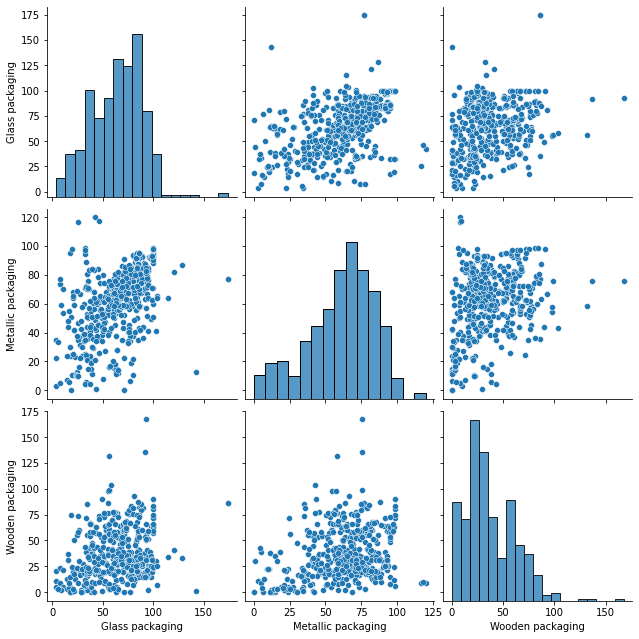

In [ ]:
sns.pairplot(data=df3[['Glass packaging', 'Metallic packaging', 'Wooden packaging']], height=3)

In [ ]:
%matplotlib notebook

In [ ]:
%matplotlib inline

# User Inputs

## Interact

In [ ]:
%%html
<iframe src="https://ipywidgets.readthedocs.io/en/7.6.2/examples/Using%20Interact.html" width="800" height="600"></iframe>

In [ ]:
def my_sum(x, y):
    return x+y

In [ ]:
my_sum(3, 5)

8

In [ ]:
@interact(x=5, y=5)
def my_sum(x, y):
    return x+y

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), IntSlider(value=5, description='y',…

In [ ]:
@interact(x=5, y=fixed(5))
def my_sum(x, y):
    return x+y

interactive(children=(IntSlider(value=5, description='x', max=15, min=-5), Output()), _dom_classes=('widget-in…

In [ ]:
@interact(x=(-10, 10), y=(-100, 100, 10))
def my_sum(x, y):
    return x+y

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

In [ ]:
@interact(waste=packaging_types.values())
def print_waste(waste):
    print(f"This is {waste}.")

interactive(children=(Dropdown(description='waste', options=('Paper and cardboard packaging', 'Plastic packagi…

In [ ]:
@interact(waste=packaging_types.items())
def print_waste(waste):
    print(f"This is {waste}.")

interactive(children=(Dropdown(description='waste', options=(('W150101', 'Paper and cardboard packaging'), ('W…

### ❓ Exercise

In [ ]:
md(f"##❓ Make all variables of the following function interactive.")

##❓ Make all variables of the following function interactive.

In [ ]:
def recycling_rate(country, waste, year):
    rate = 0
    print(f"In {year}, {country} recycled {rate:.1f}% of its {waste}.")

In [ ]:
recycling_rate('Italy', 'Plastic packaging', 2015)

In 2015, Italy recycled 0.0% of its Plastic packaging.


## Interactive

In [ ]:
def my_sum(x, y):
    return x+y

In [ ]:
z = interactive(my_sum, x=(-10, 10), y=(-100, 100, 10))

In [ ]:
type(z)

ipywidgets.widgets.interaction.interactive

In [ ]:
z.children

(IntSlider(value=0, description='x', max=10, min=-10),
 IntSlider(value=0, description='y', min=-100, step=10),
 Output())

In [ ]:
display(z)

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

In [ ]:
z.kwargs

{'x': 0, 'y': 0}

In [ ]:
z.result

0

## Non-continuous Execution

In [ ]:
z = interact_manual(my_sum, 
                    x=(-10, 10),
                    y=(-100, 100, 10))

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

In [ ]:
z = interactive(my_sum, 
                {'manual': True},
                x=(-10, 10),
                y=(-100, 100, 10))

In [ ]:
display(z)

interactive(children=(IntSlider(value=0, description='x', max=10, min=-10), IntSlider(value=0, description='y'…

In [ ]:
z.result

In [ ]:
interact(my_sum, 
         x=widgets.FloatSlider(min=-10, max=10, step=0.1, continuous_update=True),
         y=widgets.IntSlider(min=-20, max=20, step=2, continuous_update=False))

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, min=-10.0), IntSlider(value=0, continu…

<function __main__.my_sum(x, y)>

## Interactive_output

In [ ]:
a_widget = widgets.IntSlider()
b_widget = widgets.IntSlider()
c_widget = widgets.IntSlider()
ui = widgets.HBox([a_widget, b_widget, c_widget])

def f(a, b, c):
    print((a, b, c))

out = widgets.interactive_output(f, {'a': a_widget, 'b': b_widget, 'c': c_widget})

display(ui, out)

Output()

## Dependent Arguments

In [ ]:
x_widget = widgets.FloatSlider(min=0.0, max=10.0, step=0.05)
x_max_widget = widgets.FloatSlider(min=0.5, max=10.0, step=0.05, value=5.0)

def update_x_range(*args):
    x_widget.max = x_max_widget.value
x_max_widget.observe(update_x_range, 'value')

def printer(x, x_max):
    print(x, x_max)
    
interact(printer,
         x=x_widget,
         x_max=x_max_widget);

interactive(children=(FloatSlider(value=0.0, description='x', max=10.0, step=0.05), FloatSlider(value=5.0, des…

# Interactive Plots

In [ ]:
%matplotlib inline
from ipywidgets import interactive
import matplotlib.pyplot as plt

def f(m, b):
    plt.figure(figsize=(12, 8))
    x = np.linspace(-10, 10, num=1000)
    plt.plot(x, m * x + b)
    plt.ylim(-5, 5)
    plt.show()

interactive_plot = interactive(f, m=(-2.0, 2.0), b=(-3, 3, 0.5))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.0, description='m', max=2.0, min=-2.0), FloatSlider(value=0.0, descr…

In [ ]:
def plot_pairs(wastes):
    sns.pairplot(data=df3[list(wastes)], height=3)
    return plt.show()

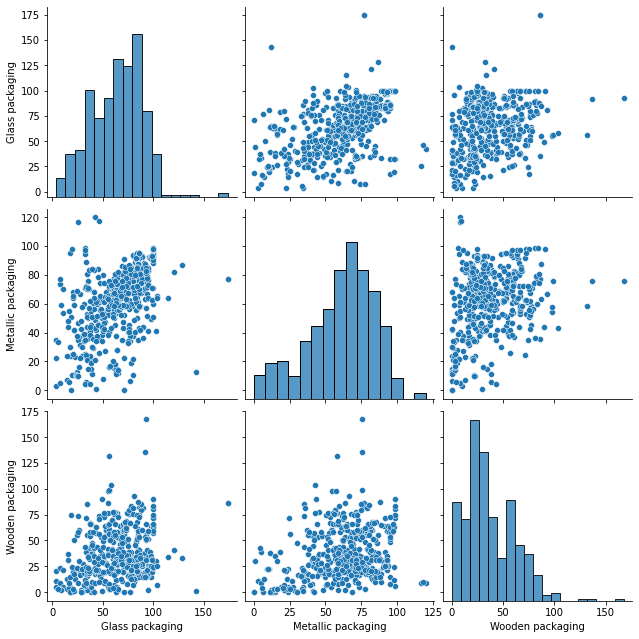

In [ ]:
plot_pairs(('Glass packaging', 'Metallic packaging', 'Wooden packaging'))

In [ ]:
my_plot = interact(plot_pairs,
                   wastes = widgets.SelectMultiple(options=packaging_types.values(),
                                                   value=list(packaging_types.values())[:3],
                                                   rows=len(packaging_types.values()),
                                                   description='wastes',
                                                   disabled=False))

interactive(children=(SelectMultiple(description='wastes', index=(0, 1, 2), options=('Paper and cardboard pack…

### ❓ Exercise

In [ ]:
md(f"##❓ Pick a graph from Course 08 and make it interactive. Let the Widget List inspire you!")

##❓ Pick a graph from Course 08 and make it interactive. Let the Widget List inspire you!

In [ ]:
%%html
<iframe src="https://ipywidgets.readthedocs.io/en/7.6.2/examples/Widget%20List.html" width="800" height="600"></iframe>

# Other great Libraries
- Hover over
- Webpage integration

## Bokeh

In [ ]:
%%html
<iframe src="https://bokeh.org/" width="800" height="600"></iframe>

## Plotly

In [ ]:
%%html
<iframe src="https://plotly.com/python/" width="800" height="600"></iframe>

## Altair

In [ ]:
%%html
<iframe src="https://altair-viz.github.io/" width="800" height="600"></iframe>